In [247]:
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPool2D, UpSampling2D, Activation, Lambda
from keras.losses import mean_squared_error, kullback_leibler_divergence, categorical_crossentropy, binary_crossentropy

In [139]:
def autoencoder (encoder, decoder, shape, loss=mean_squared_error, optimizer="adam", middle=None):
    X = Input(shape)
    Y = encoder(X)
    if middle:
        Y = middle(Y)
    Y = decoder(Y)
    ae = Model(inputs=X, outputs=Y)
    ae.compile(optimizer, loss, metrics=["acc"])
    return ae

In [140]:
def dense_encoder (shape, features, layers=5, nodes=5, loss=mean_squared_error, optimizer="adam", activation="relu"):
    X = Input((shape,))
    H = Dense(nodes, activation=activation)(X)
    for i in range(layers - 2):
        H = Dense(nodes, activation=activation)(H)
    Y = Dense(features, activation=activation)(H)
    enc = Model(inputs=X, outputs=Y)
    enc.compile(optimizer, loss, metrics=["acc"])
    return enc
def dense_decoder (shape, features, layers=5, nodes=5, loss=mean_squared_error, optimizer="adam", activation="relu"):
    X = Input((features,))
    H = Dense(nodes, activation=activation)(X)
    for i in range(layers - 2):
        H = Dense(nodes, activation=activation)(H)
    Y = Dense(shape, activation=activation)(H)
    dec = Model(inputs=X, outputs=Y)
    dec.compile(optimizer, loss, metrics=["acc"])
    return dec

In [141]:
def sample(features, mean, dev):
    return K.random_normal((features), mean, dev)
def variation(features, loss=mean_squared_error, optimizer="adam", activation="relu"):
    X = Input(features)
    mean = Dense(features, activation=activation)(X)
    dev = Dense(features, activation=activation)(X)
    sampled = Lambda(sample, output_shape=(features,))([features, mean, dev])
    var = Model(inputs=X, outputs=sampled)
    var.compile(loss, optimizer, metrics=["acc"])
    return var
def var_loss(loss, dist):
    return lambda X, Y: loss(X, Y) + kullback_leibler_divergence(X, dist)

In [142]:
from keras.datasets import mnist
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX.reshape(trainX.shape[0], 784) / 256.
testX = testX.reshape(testX.shape[0], 784) / 256.

In [143]:
import matplotlib.pyplot as plt

In [144]:
enc = dense_encoder(784, 8, 2, 16)
dec = dense_decoder(784, 8, 2, 16)
ae = autoencoder(enc, dec, (784,))

In [149]:
ae.fit(trainX[:1000], trainX[:1000], epochs=20, batch_size=32, shuffle=True)
ae.evaluate(testX, testX)

Epoch 1/20
1000/1000 [==============================] - 0s 410us/step - loss: 0.0354 - acc: 0.0040
Epoch 2/20
1000/1000 [==============================] - 0s 423us/step - loss: 0.0349 - acc: 0.0070
Epoch 3/20
1000/1000 [==============================] - 0s 425us/step - loss: 0.0347 - acc: 0.0080
Epoch 4/20
1000/1000 [==============================] - 0s 408us/step - loss: 0.0345 - acc: 0.0070
Epoch 5/20
1000/1000 [==============================] - 0s 407us/step - loss: 0.0344 - acc: 0.0060
Epoch 6/20
1000/1000 [==============================] - 0s 414us/step - loss: 0.0342 - acc: 0.0040
Epoch 7/20
1000/1000 [==============================] - 0s 408us/step - loss: 0.0341 - acc: 0.0040
Epoch 8/20
1000/1000 [==============================] - 0s 418us/step - loss: 0.0341 - acc: 0.0080
Epoch 9/20
1000/1000 [==============================] - 0s 405us/step - loss: 0.0340 - acc: 0.0030
Epoch 10/20
1000/1000 [==============================] - 0s 407us/step - loss: 0.0340 - acc: 0.0030
Epoch 11/

[0.037457358753681183, 0.0080999999999999996]

# Something went wrong...

In [150]:
del autoencoder, dense_decoder, dense_encoder, variation, var_loss

In [152]:
def autoencoder(enc, dec, shape, features, middle=None, loss=mean_squared_error, optimizer="sgd", metrics=["acc"]):
    inputs = Input(shape)
    latent = enc(inputs)
    if middle:
        latent = middle(latent)
    outputs = dec(latent)
    ae = Model(inputs, outputs)
    ae.compile(optimizer, loss, metrics=metrics)
    return inputs, enc, latent, middle, dec, ae
_, _, _, _, _, ae = autoencoder(Dense(5), Dense(784), (784,), (5,))
ae.fit(trainX[:1000], trainX[:1000], epochs=20)
ae.evaluate(testX, testX)

Epoch 1/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1115 - acc: 1.0000e-03
Epoch 2/20
1000/1000 [==============================] - 0s 354us/step - loss: 0.1112 - acc: 0.0030
Epoch 3/20
1000/1000 [==============================] - 0s 377us/step - loss: 0.1110 - acc: 0.0030
Epoch 4/20
1000/1000 [==============================] - 0s 442us/step - loss: 0.1108 - acc: 0.0030
Epoch 5/20
1000/1000 [==============================] - 0s 422us/step - loss: 0.1106 - acc: 0.0030
Epoch 6/20
1000/1000 [==============================] - 0s 363us/step - loss: 0.1104 - acc: 0.0030
Epoch 7/20
1000/1000 [==============================] - 0s 365us/step - loss: 0.1102 - acc: 0.0030
Epoch 8/20
1000/1000 [==============================] - 0s 367us/step - loss: 0.1100 - acc: 0.0030
Epoch 9/20
1000/1000 [==============================] - 0s 428us/step - loss: 0.1099 - acc: 0.0030
Epoch 10/20
1000/1000 [==============================] - 0s 424us/step - loss: 0.1097 - acc: 0.0030
Epoch 1

[0.11285878252983093, 0.0028]

# Alright, the simplest case...

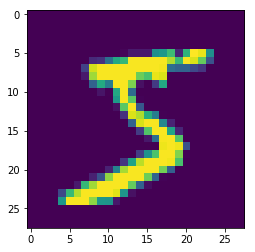

In [153]:
plt.imshow(trainX[0].reshape((28, 28)))

In [155]:
inputs = Input ((784,))
latent = Dense(8, activation="relu")(inputs)
outputs = Dense(784, activation="sigmoid")(latent)
ae = Model(inputs, outputs)
ae.compile("adam", mean_squared_error, metrics=["acc"])
ae.fit(trainX[:1000], trainX[:1000], validation_data=(testX, testX), epochs=20, batch_size=256, shuffle=True)

Train on 1000 samples, validate on 10000 samples
Epoch 1/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2301 - acc: 0.0020 - val_loss: 0.2284 - val_acc: 0.0012
Epoch 2/20
1000/1000 [==============================] - 1s 900us/step - loss: 0.2268 - acc: 0.0000e+00 - val_loss: 0.2236 - val_acc: 7.0000e-04
Epoch 3/20
1000/1000 [==============================] - 1s 971us/step - loss: 0.2211 - acc: 0.0000e+00 - val_loss: 0.2160 - val_acc: 4.0000e-04
Epoch 4/20
1000/1000 [==============================] - 1s 926us/step - loss: 0.2124 - acc: 0.0000e+00 - val_loss: 0.2052 - val_acc: 3.0000e-04
Epoch 5/20
1000/1000 [==============================] - 1s 927us/step - loss: 0.2007 - acc: 0.0000e+00 - val_loss: 0.1917 - val_acc: 3.0000e-04
Epoch 6/20
1000/1000 [==============================] - 1s 952us/step - loss: 0.1863 - acc: 0.0000e+00 - val_loss: 0.1761 - val_acc: 3.0000e-04
Epoch 7/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1703 - acc: 0.0000e

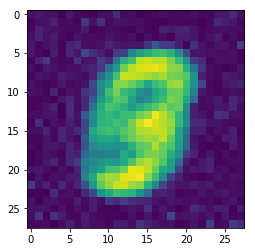

In [158]:
plt.imshow(ae.predict(trainX[0].reshape(1, 784)).reshape(28, 28))

# Well, let's test the example...

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.3610 - acc: 0.7521 - val_loss: 0.2714 - val_acc: 0.7949
Epoch 2/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.2641 - acc: 0.7968 - val_loss: 0.2532 - val_acc: 0.7962
Epoch 3/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.2434 - acc: 0.7965 - val_loss: 0.2317 - val_acc: 0.7955
Epoch 4/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.2247 - acc: 0.7963 - val_loss: 0.2152 - val_acc: 0.7961
Epoch 5/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.2104 - acc: 0.7976 - val_loss: 0.2025 - val_acc: 0.7981
Epoch 6/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.1989 - acc: 0.7992 - val_loss: 0.1922 - val_acc: 0.7998
Epoch 7/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.1895 - 

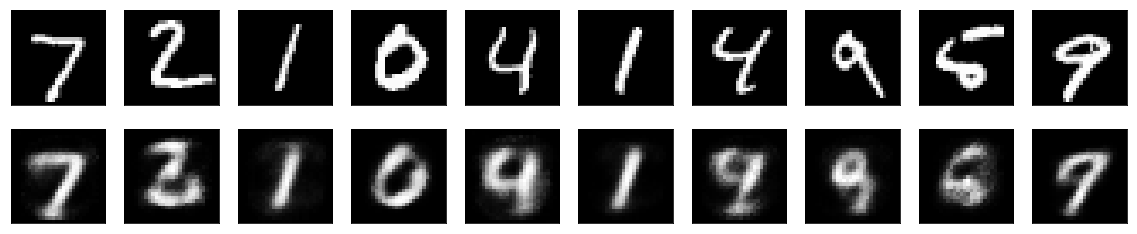

In [163]:
from keras.layers import Input, Dense
from keras.models import Model
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=["acc"])
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [169]:
def draw(x, encoder, decoder, n=10):
    encoded_imgs = encoder.predict(x)
    decoded_imgs = decoder.predict(encoded_imgs)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

Epoch 1/10
60000/60000 [==============================] - 23s 392us/step - loss: 0.3814 - acc: 0.7821
Epoch 2/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.2524 - acc: 0.7412
Epoch 3/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.2213 - acc: 0.7080
Epoch 4/10
60000/60000 [==============================] - 21s 343us/step - loss: 0.1863 - acc: 0.6863
Epoch 5/10
60000/60000 [==============================] - 25s 415us/step - loss: 0.1667 - acc: 0.6747
Epoch 6/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.1593 - acc: 0.6639
Epoch 7/10
60000/60000 [==============================] - 25s 409us/step - loss: 0.1533 - acc: 0.6608
Epoch 8/10
60000/60000 [==============================] - 25s 414us/step - loss: 0.1474 - acc: 0.6648
Epoch 9/10
60000/60000 [==============================] - 25s 422us/step - loss: 0.1423 - acc: 0.6625
Epoch 10/10
60000/60000 [==============================] - 23s 388us/step - loss: 

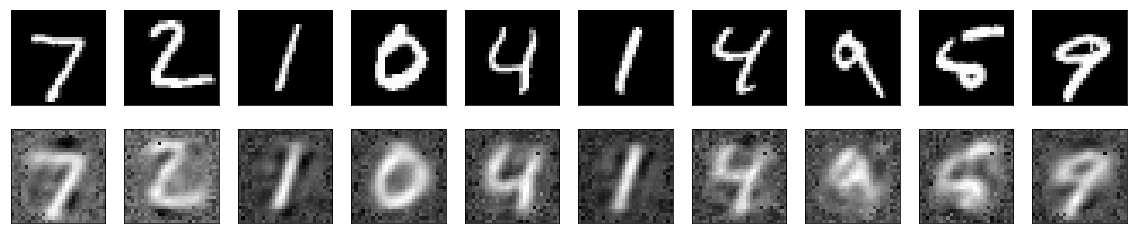

In [172]:
inputs = Input((784,))
latent = Dense(32)(inputs)
outputs = Dense(784)(latent)
ae = Model(inputs, outputs)
enc = Model(inputs, latent)
dec_layer = ae.layers[-1]
dec_input = Input((32,))
dec = Model(dec_input, dec_layer(dec_input))
ae.compile("adadelta", binary_crossentropy, metrics=["acc"])
ae.fit(trainX, trainX, epochs=10, batch_size=256, shuffle=True)
draw(testX, enc, dec)

In [178]:
def autoencoder (encoder, decoder, shape, loss=mean_squared_error, optimizer="adam", middle=None, metrics=["acc"]):
    X = Input(shape)
    Y = encoder(X)
    if middle:
        Y = middle(Y)
    Y = decoder(Y)
    ae = Model(inputs=X, outputs=Y)
    ae.compile(optimizer, loss, metrics=metrics)
    return ae

In [179]:
def dense_encoder (shape, features, layers=5, nodes=5, loss=mean_squared_error, optimizer="adam", activation="relu"):
    X = Input((shape,))
    H = Dense(nodes, activation=activation)(X)
    for i in range(layers - 2):
        H = Dense(nodes, activation=activation)(H)
    Y = Dense(features, activation=activation)(H)
    enc = Model(inputs=X, outputs=Y)
    enc.compile(optimizer, loss, metrics=["acc"])
    return enc
def dense_decoder (shape, features, layers=5, nodes=5, loss=mean_squared_error, optimizer="adam", activation="relu"):
    X = Input((features,))
    H = Dense(nodes, activation=activation)(X)
    for i in range(layers - 2):
        H = Dense(nodes, activation=activation)(H)
    Y = Dense(shape, activation=activation)(H)
    dec = Model(inputs=X, outputs=Y)
    dec.compile(optimizer, loss, metrics=["acc"])
    return dec

In [180]:
def sample(mean, dev):
    return K.random_normal(mean, dev)
def variation(features, loss=mean_squared_error, optimizer="adam", activation="sigmoid"):
    X = Input(features)
    mean = Dense(features, activation=activation)(X)
    dev = Dense(features, activation=activation)(X)
    sampled = Lambda(sample, output_shape=(features,))([mean, dev])
    var = Model (X, sampled)
    return var
def var_loss(loss, dist):
    return lambda X, Y: loss(X, Y) + kullback_leibler_divergence(X, dist)

In [184]:
enc = dense_encoder(784, 32)
dec = dense_decoder(784, 32)
ae = autoencoder(enc,
                 dec,
                 (784,),
                 loss=binary_crossentropy,
                 optimizer="adadelta"
                )
ae.fit(trainX, trainX, validation_data=(testX, testX), epochs=50, batch_size=256, shuffle=True)
draw(testX, enc, dec)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 28s 462us/step - loss: 2.0978 - acc: 0.8088 - val_loss: 2.1275 - val_acc: 0.8072
Epoch 2/50
60000/60000 [==============================] - 20s 326us/step - loss: 2.0978 - acc: 0.8088 - val_loss: 2.1275 - val_acc: 0.8072
Epoch 3/50
60000/60000 [==============================] - 20s 336us/step - loss: 2.0978 - acc: 0.8088 - val_loss: 2.1275 - val_acc: 0.8072
Epoch 4/50
60000/60000 [==============================] - 19s 324us/step - loss: 2.0978 - acc: 0.8088 - val_loss: 2.1275 - val_acc: 0.8072
Epoch 5/50
60000/60000 [==============================] - 20s 328us/step - loss: 2.0978 - acc: 0.8088 - val_loss: 2.1275 - val_acc: 0.8072
Epoch 6/50
60000/60000 [==============================] - 20s 339us/step - loss: 2.0978 - acc: 0.8088 - val_loss: 2.1275 - val_acc: 0.8072
Epoch 7/50
60000/60000 [==============================] - 20s 332us/step - loss: 2.0978 - acc: 0.8088 - val_loss: 2.

KeyboardInterrupt: 

# It didn't go well...

In [302]:
def autoencoder (encoder, decoder, shape, features, loss=mean_squared_error, optimizer="adam", middle=None, metrics=["acc"]):
    added_loss = K.constant(0.)
    X = Input(shape)
    Y = encoder(X)
    if middle:
        y, new_loss = middle(features)
        added_loss = added_loss + new_loss
        Y = y (Y)
    Y = decoder(Y)
    ae = Model(inputs=X, outputs=Y)
    ae.compile(optimizer, lambda X, Y: loss(X, Y) + added_loss, metrics=metrics)
    return ae

Epoch 1/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.3545 - acc: 0.0088
Epoch 2/10
60000/60000 [==============================] - 22s 365us/step - loss: 0.2623 - acc: 0.0174
Epoch 3/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.2418 - acc: 0.0193
Epoch 4/10
60000/60000 [==============================] - 22s 370us/step - loss: 0.2230 - acc: 0.0171
Epoch 5/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.2079 - acc: 0.0153
Epoch 6/10
60000/60000 [==============================] - 22s 364us/step - loss: 0.1965 - acc: 0.0142
Epoch 7/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.1879 - acc: 0.0131
Epoch 8/10
60000/60000 [==============================] - 22s 373us/step - loss: 0.1808 - acc: 0.0125
Epoch 9/10
60000/60000 [==============================] - 23s 380us/step - loss: 0.1749 - acc: 0.0129
Epoch 10/10
60000/60000 [==============================] - 24s 393us/step - loss: 

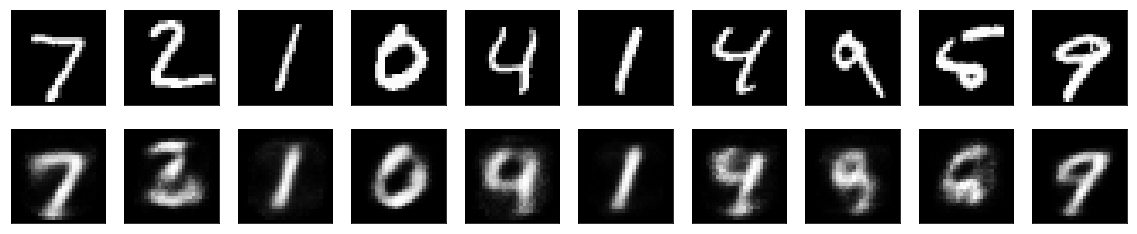

In [250]:
enc = Sequential()
enc.add(Dense(32, input_dim=784, activation="relu"))
dec = Sequential()
dec.add(Dense(784, input_dim=32, activation="sigmoid"))
ae = autoencoder(enc, dec, (784,), 32, loss=binary_crossentropy, optimizer="adadelta")
ae.fit(trainX, trainX, epochs=10, batch_size=256, shuffle=True)
draw(testX, enc, dec)

In [251]:
def dense_model(inputs, outputs, layers=2, nodes=64, activation="sigmoid"):
    model = Sequential()
    if layers > 1:
        model.add(Dense(nodes, input_dim=inputs, activation=activation))
        for i in range(layers - 2):
            model.add(Dense(nodes, activation=activation))
        model.add(Dense(outputs, activation=activation))
    else:
        model.add(Dense(outputs, input_dim=inputs, activation=activation))
    return model

Epoch 1/5
60000/60000 [==============================] - 30s 501us/step - loss: 0.2747 - acc: 0.0114
Epoch 2/5
60000/60000 [==============================] - 22s 374us/step - loss: 0.1715 - acc: 0.0129
Epoch 3/5
60000/60000 [==============================] - 20s 337us/step - loss: 0.1454 - acc: 0.01042s - loss: 0.146 - ETA: 1s - loss: 0.1459
Epoch 4/5
60000/60000 [==============================] - 19s 325us/step - loss: 0.1299 - acc: 0.0103
Epoch 5/5
60000/60000 [==============================] - 20s 328us/step - loss: 0.1195 - acc: 0.0103


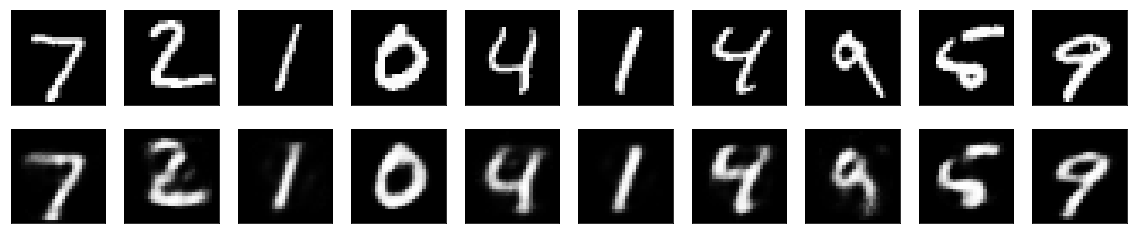

In [325]:
enc = dense_model(784, 32, layers=1, activation="relu")
dec = dense_model(32, 784, layers=1)
ae = autoencoder(enc, dec, (784,), 32, loss=binary_crossentropy, optimizer="adam")
ae.fit(trainX, trainX, epochs=5, batch_size=256, shuffle=True)
draw(testX, enc, dec)

Epoch 1/5
60000/60000 [==============================] - 34s 563us/step - loss: 0.3109 - acc: 0.0110
Epoch 2/5
60000/60000 [==============================] - 26s 428us/step - loss: 0.2637 - acc: 0.0130
Epoch 3/5
60000/60000 [==============================] - 26s 440us/step - loss: 0.2630 - acc: 0.0122
Epoch 4/5
60000/60000 [==============================] - 25s 410us/step - loss: 0.2628 - acc: 0.0127
Epoch 5/5
60000/60000 [==============================] - 24s 408us/step - loss: 0.2627 - acc: 0.0118


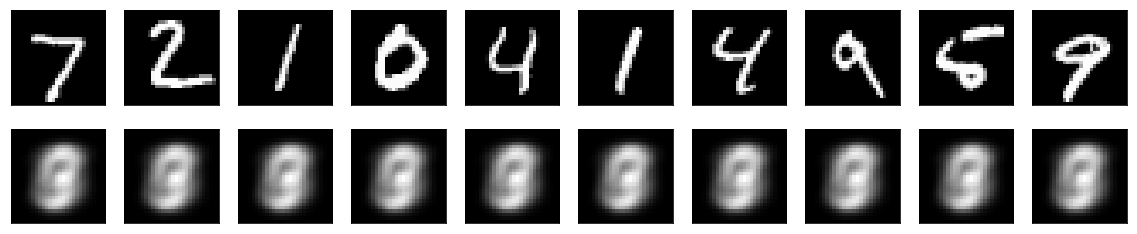

In [326]:
enc = dense_model(784, 2, layers=3)
dec = dense_model(2, 784, layers=3)
ae = autoencoder(enc, dec, (784,), 32, loss=binary_crossentropy, optimizer="adam")
ae.fit(trainX, trainX, epochs=5, batch_size=256, shuffle=True)
draw(testX, enc, dec)

In [327]:
def sample (dec, epsilon_std=1, n=15):
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    grid_x = np.linspace(-15, 15, n)
    grid_y = np.linspace(-15, 15, n)

    for i, yi in enumerate(grid_x):
        for j, xi in enumerate(grid_y):
            z_sample = np.array([[xi, yi]]) * epsilon_std
            x_decoded = dec.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    plt.imshow(figure)
    plt.show()

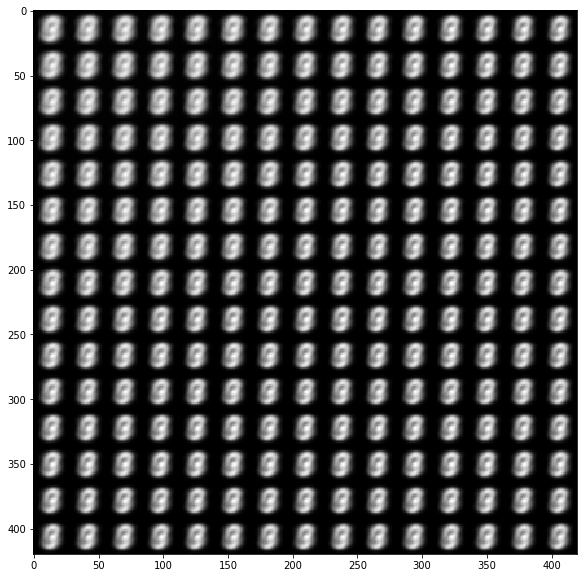

In [328]:
sample(dec, epsilon_std=1)

In [329]:
def space(enc):
    Y = enc.predict(testX)
    plt.scatter(Y[:, 0], Y[:, 1], c=testY)
    plt.colorbar()

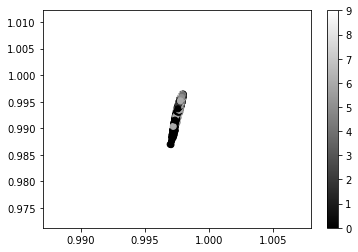

In [330]:
space(enc)

# Not a very useful distribution. Let's add variation! 
# (づȌل͜Ȍ)づ (づȌل͜Ȍ)づ (∩の‿  の)⊃━☆ﾟ.*

In [356]:
def autoencoder (encoder, decoder, shape, features, loss=mean_squared_error, optimizer="adam", middle=None, metrics=["acc"]):
    added_loss = K.constant(0.)
    X = Input(shape)
    Y = encoder(X)
    if middle:
        Y, new_loss = middle(Y, features)
        added_loss = added_loss + new_loss
    Y = decoder(Y)
    ae = Model(inputs=X, outputs=Y)
    ae.compile(optimizer, lambda X, Y: loss(X, Y) + added_loss, metrics=metrics)
    return ae

In [359]:
def var_loss (z_mean, z_log_sigma):
    return -0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
def variation_loss (args):
    z_mean, z_log_sigma = args
    return var_loss (z_mean, z_log_sigma)
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(K.shape(z_mean))
    return z_mean + K.exp(z_log_sigma) * epsilon
def vae_middle(x, features):
    z_mean = Dense (features, activation="relu")(x)
    z_log_sigma = Dense (features, activation="relu")(x)
    z = Lambda (sampling)([z_mean, z_log_sigma])
    loss = Lambda (variation_loss)([z_mean, z_log_sigma])
    return z, loss

In [364]:
enc = dense_model(784, 2, layers=3)
dec = dense_model(2, 784, layers=3)
ae = autoencoder(enc, dec, (784,), 2, loss=binary_crossentropy, optimizer="adam")
ae.fit(trainX, trainX, epochs=5, batch_size=256, shuffle=True)

Epoch 1/5
60000/60000 [==============================] - 56s 941us/step - loss: 0.3111 - acc: 0.0119
Epoch 2/5
60000/60000 [==============================] - 41s 686us/step - loss: 0.2638 - acc: 0.0121
Epoch 3/5
60000/60000 [==============================] - 41s 684us/step - loss: 0.2627 - acc: 0.0131
Epoch 4/5
60000/60000 [==============================] - 40s 660us/step - loss: 0.2619 - acc: 0.0133
Epoch 5/5
60000/60000 [==============================] - 39s 651us/step - loss: 0.2608 - acc: 0.0135


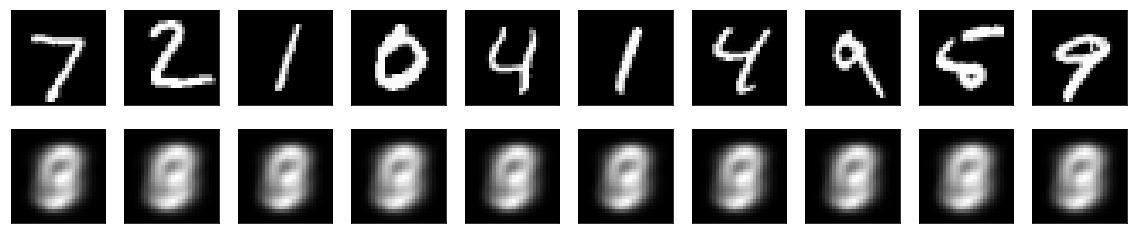

In [365]:
draw(testX, enc, dec)

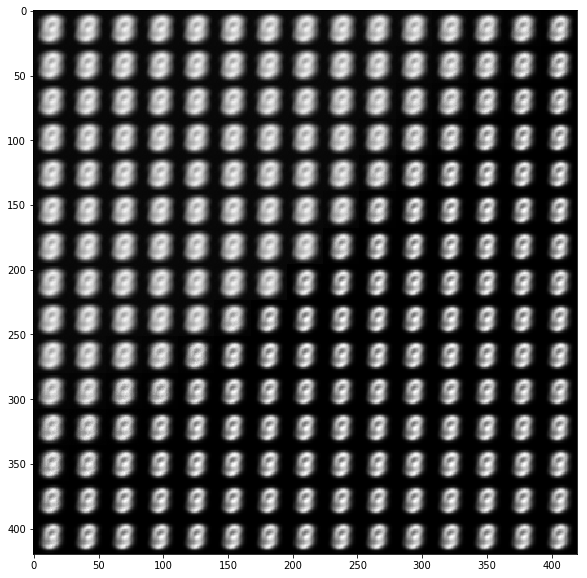

In [369]:
sample(dec, epsilon_std=10)

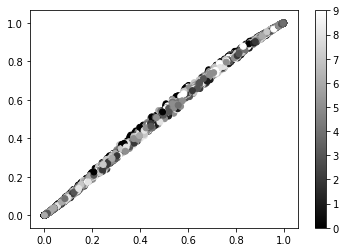

In [367]:
space(enc)

# Kinda strange...

In [397]:
def autoencoder (encoder, decoder, shape, features, loss=mean_squared_error, optimizer="adam", middle=None, metrics=["acc"]):
    losses = [loss]
    X = Input(shape)
    Y = encoder(X)
    if middle:
        model, new_loss = middle(features)
        Y = model(Y)
        losses.append(lambda X, Y: new_loss)
    Y = decoder(Y)
    ae = Model(inputs=X, outputs=Y)
    ae.compile(optimizer, lambda X, Y: sum (map(lambda L: L(X, Y), losses)), metrics=metrics)
    return ae

In [517]:
epsilon_std = 1
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=K.shape(z_mean),
                              mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_sigma) * epsilon
def vae_middle(features, activation="relu"):
    x = Input((features,))
    z_mean = Dense (features, activation=activation)(x)
    z_log_sigma = Dense (features, activation=activation)(x)
    z = Lambda(sampling)([z_mean, z_log_sigma])
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return Model(x, z), kl_loss

In [427]:
enc = dense_model(784, 2, layers=3)
dec = dense_model(2, 784, layers=3)
ae = autoencoder(enc, dec, (784,), 2, loss=binary_crossentropy, optimizer="adadelta", middle=vae_middle)
ae.fit(trainX, trainX, epochs=5, batch_size=256, shuffle=True)
draw(testX, enc, dec)

Epoch 1/5


InvalidArgumentError: You must feed a value for placeholder tensor 'input_218' with dtype float
	 [[Node: input_218 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'input_218', defined at:
  File "C:\Users\s\Anaconda3\envs\pixor\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\s\Anaconda3\envs\pixor\lib\asyncio\base_events.py", line 421, in run_forever
    self._run_once()
  File "C:\Users\s\Anaconda3\envs\pixor\lib\asyncio\base_events.py", line 1425, in _run_once
    handle._run()
  File "C:\Users\s\Anaconda3\envs\pixor\lib\asyncio\events.py", line 127, in _run
    self._callback(*self._args)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-427-f8cff493781a>", line 3, in <module>
    ae = autoencoder(enc, dec, (784,), 2, loss=binary_crossentropy, optimizer="adadelta", middle=vae_middle)
  File "<ipython-input-397-94da7c27a69a>", line 6, in autoencoder
    model, new_loss = middle(features)
  File "<ipython-input-426-99e1f4fe5f2e>", line 8, in vae_middle
    x = Input((features,))
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\keras\engine\input_layer.py", line 176, in Input
    input_tensor=tensor)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\keras\engine\input_layer.py", line 85, in __init__
    name=self.name)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\keras\backend\tensorflow_backend.py", line 514, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1507, in placeholder
    name=name)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1997, in _placeholder
    name=name)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\tensorflow\python\framework\ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\s\Anaconda3\envs\pixor\lib\site-packages\tensorflow\python\framework\ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'input_218' with dtype float
	 [[Node: input_218 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [518]:
def autoencoder (encoder, decoder, shape, features, loss=mean_squared_error, optimizer="adam", metrics=["acc"], wrap=wrapper):
    X = Input(shape)
    enc_loss = K.constant(0.)
    dec_loss = K.constant(0.)
    try:
        Y, enc_loss = encoder(X)
    except TypeError:
        enc = wrap(encoder, shape)
        Y, enc_loss = enc(X)
    try:
        Y, dec_loss = decoder(Y)
    except TypeError:
        dec = wrap(decoder, features)
        Y, dec_loss = dec(Y)
    ae = Model(inputs=X, outputs=Y)
    ae.compile(optimizer, lambda X, Y: loss(X, Y) + enc_loss + dec_loss, metrics=metrics)
    return ae

In [519]:
def wrapper (model, input_shape, c=0.):
    inputs = Input(input_shape)
    Y = model(inputs)
    Z = Model(inputs, [Y,
                       Lambda(lambda x: 
                              K.sum(
                                  x * K.constant(0.) + 
                                  Input(tensor=K.variable([c]))
                              )
                             )
                       (Y)
                      ]
             )
    return Z

In [469]:
enc = dense_model(784, 32, layers=1, activation="relu")
dec = dense_model(32, 784, layers=1)
ae = autoencoder(enc, dec, (784,), (32,), loss=binary_crossentropy, optimizer="adam")
ae.fit(trainX, trainX, epochs=5, batch_size=256, shuffle=True)

Epoch 1/5
60000/60000 [==============================] - 39s 649us/step - loss: 0.2770 - acc: 0.0109
Epoch 2/5
60000/60000 [==============================] - 27s 452us/step - loss: 0.1711 - acc: 0.0104
Epoch 3/5
60000/60000 [==============================] - 26s 437us/step - loss: 0.1453 - acc: 0.0098
Epoch 4/5
60000/60000 [==============================] - 28s 463us/step - loss: 0.1292 - acc: 0.0099
Epoch 5/5
60000/60000 [==============================] - 27s 455us/step - loss: 0.1188 - acc: 0.0102


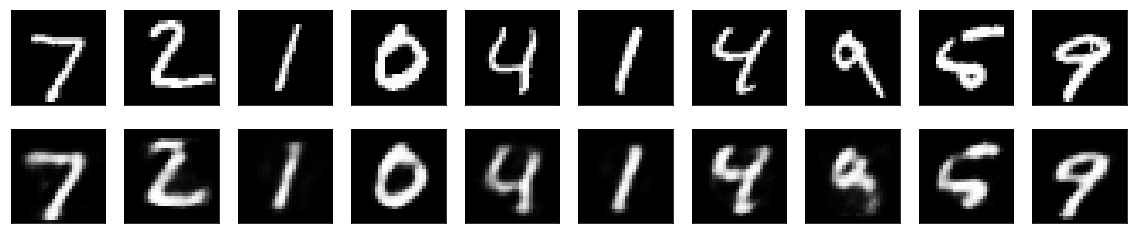

In [470]:
draw(testX, enc, dec)

In [520]:
def sampling(args):
        z_mean, z_log_sigma = args
        epsilon = K.random_normal(shape=K.shape(z_mean),
                                  mean=0., stddev=1)
        return z_mean + K.exp(z_log_sigma) * epsilon
def vae_loss(args):
        z_mean, z_log_sigma = args
        return - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
def vae_wrapper (model, input_shape, features):
    inputs = Input(input_shape)
    Y = model(inputs)
    z_mean = Dense(features, activation="sigmoid")(Y)
    z_log_sigma = Dense(features, activation="sigmoid")(Y)
    z = Lambda(sampling)([z_mean, z_log_sigma])
    kl_loss = Lambda (vae_loss)([z_mean, z_log_sigma])
    Z = Model(inputs, [z_mean, kl_loss])
    return Z

In [521]:
latent_dims = 2

enc = dense_model(784, latent_dims, layers=1, activation="relu")
dec = dense_model(latent_dims, 784, layers=1)

wrapped_enc = vae_wrapper(enc, (784,), latent_dims)
wrapped_dec = wrapper(dec, (latent_dims,))

ae = autoencoder(wrapped_enc,
                 wrapped_dec,
                 (784,),
                 (latent_dims,),
                 loss=binary_crossentropy,
                 optimizer="adam")
ae.fit(trainX, trainX, epochs=5, batch_size=256, shuffle=True)

Epoch 1/5
60000/60000 [==============================] - 47s 783us/step - loss: 0.6752 - acc: 0.0132
Epoch 2/5
60000/60000 [==============================] - 25s 411us/step - loss: 0.5839 - acc: 0.0150
Epoch 3/5
60000/60000 [==============================] - 23s 389us/step - loss: 0.5267 - acc: 0.0150
Epoch 4/5
60000/60000 [==============================] - 24s 401us/step - loss: 0.4795 - acc: 0.0153
Epoch 5/5
60000/60000 [==============================] - 26s 429us/step - loss: 0.4379 - acc: 0.0152


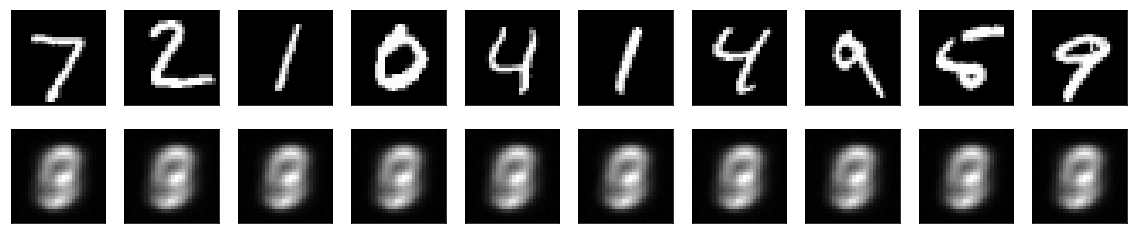

In [489]:
draw(testX, enc, dec)

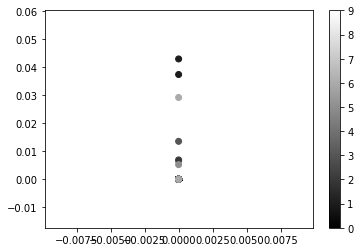

In [490]:
space(enc=enc)

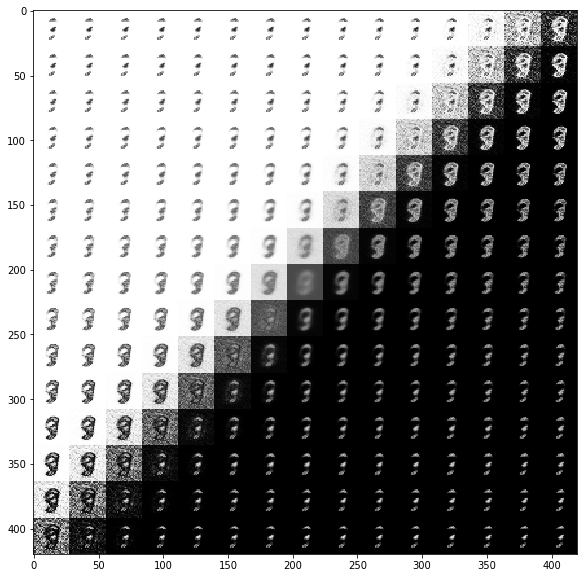

In [493]:
sample(dec=dec, epsilon_std=1)

In [526]:
def sampling(args):
        z_mean, z_log_sigma = args
        epsilon = K.random_normal(shape=K.shape(z_mean),
                                  mean=0., stddev=1)
        return z_mean + K.exp(z_log_sigma) * epsilon
def vae_loss(weight):
    def kl_loss(args):
        z_mean, z_log_sigma = args
        return weight * (- 0.5) * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return kl_loss
def vae_wrapper (model, input_shape, features, weight=2.):
    inputs = Input(input_shape)
    Y = model(inputs)
    z_mean = Dense(features, activation="sigmoid")(Y)
    z_log_sigma = Dense(features, activation="sigmoid")(Y)
    z = Lambda(sampling)([z_mean, z_log_sigma])
    kl_loss = Lambda (vae_loss(weight))([z_mean, z_log_sigma])
    Z = Model(inputs, [z_mean, kl_loss])
    return Z

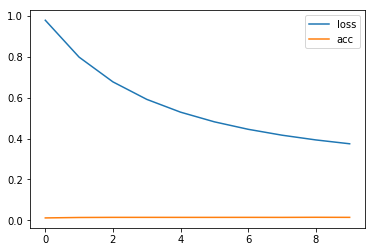

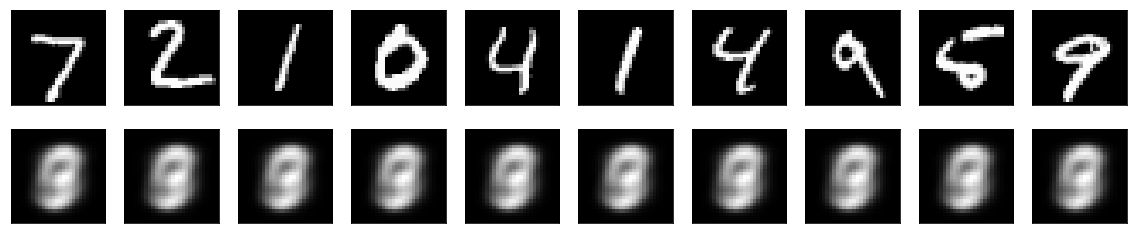

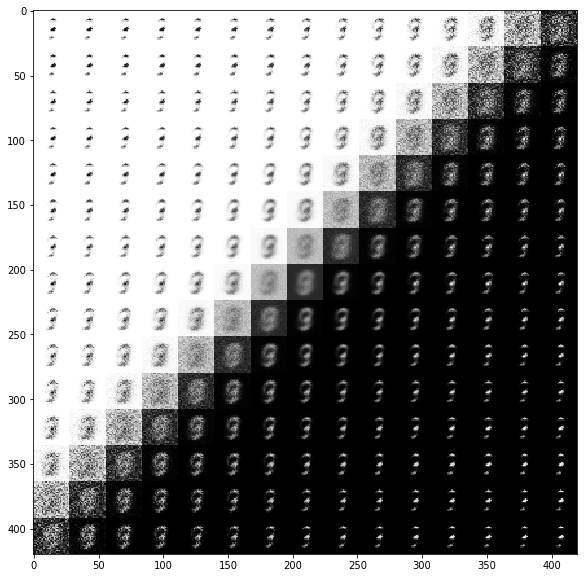

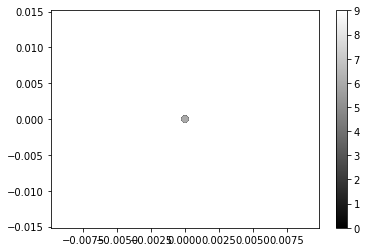

In [527]:
import keras
from IPython.display import clear_output

latent_dims = 2

enc = dense_model(784, latent_dims, layers=1, activation="relu")
dec = dense_model(latent_dims, 784, layers=1)
wrapped_enc = vae_wrapper(enc, (784,), latent_dims)
wrapped_dec = wrapper(dec, (latent_dims,))

ae = autoencoder(wrapped_enc,
                 wrapped_dec,
                 (784,),
                 (latent_dims,),
                 loss=binary_crossentropy,
                 optimizer="adam")

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('acc'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="acc")
        plt.legend()
        plt.show();
plot_losses = PlotLosses()

ae.fit(trainX, trainX, epochs=10, batch_size=256, shuffle=True, callbacks=[plot_losses])
draw(testX, enc, dec)
plt.show()
sample(dec)
plt.show()
space(enc)
plt.show()

# Alright, I'm not giving up.
But the awesome API will not be able to survive. Too bad for it.

In [575]:
class VAE:
    def __init__(self, enc, dec, input_shape, feature_shape, epsilon_std=1., loss=binary_crossentropy, optimizer="adam", metrics=["acc"]):
        self.epsilon_std = epsilon_std
        self.x = Input(input_shape)
        self.latent = enc(self.x)
        self.z_mean = Dense(feature_shape[0])(self.latent)
        self.z_log_sigma = Dense(feature_shape[0])(self.latent)
        self.z = Lambda(self.sampling)([self.z_mean, self.z_log_sigma])
        self.y = dec (self.z)
        self.model = Model(self.x, self.y)
        def complete_loss (x, x_decoded_mean):
            custom_loss = loss(x, x_decoded_mean)
            kl_loss = - 0.5 * K.mean(1 + self.z_log_sigma - K.square(self.z_mean) - K.exp(self.z_log_sigma), axis=-1)
            return custom_loss + kl_loss
        self.model.compile(optimizer,
                           complete_loss,
                           metrics=metrics)
        self.encoder = Model(self.x, self.z)
        self.decoder = dec
    def sampling(self, args):
        z_mean, z_log_sigma = args
        epsilon = K.random_normal(shape=K.shape(z_mean),
                                  mean=0., stddev=self.epsilon_std)
        return z_mean + K.exp(z_log_sigma) * epsilon
    def fit (self, X, Y=None, plot_losses=False, epochs=10, batch_size=256):
        if Y is None:
            Y = X
        callbacks = []
        if plot_losses:
            callbacks.append(PlotLosses())
        return self.model.fit(X, Y, callbacks=callbacks, batch_size=batch_size, epochs=epochs, shuffle=True)
    def predict (self, X):
        return self.model.predict(X)

In [576]:
latent_dims = 2

enc = dense_model(784, latent_dims, layers=3)
dec = dense_model(latent_dims, 784, layers=3)

ae = VAE(enc,
         dec,
         (784,),
         (latent_dims,),
         loss=binary_crossentropy,
         optimizer="rmsprop")

In [577]:
ae.fit(trainX)

Epoch 1/10
60000/60000 [==============================] - 51s 847us/step - loss: 0.2982 - acc: 0.0120
Epoch 2/10
60000/60000 [==============================] - 31s 524us/step - loss: 0.2626 - acc: 0.0121
Epoch 3/10
60000/60000 [==============================] - 31s 518us/step - loss: 0.2626 - acc: 0.0116
Epoch 4/10
60000/60000 [==============================] - 32s 531us/step - loss: 0.2626 - acc: 0.0122
Epoch 5/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.2626 - acc: 0.0123
Epoch 6/10
60000/60000 [==============================] - 31s 513us/step - loss: 0.2626 - acc: 0.0122
Epoch 7/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.2626 - acc: 0.0131
Epoch 8/10
60000/60000 [==============================] - 30s 505us/step - loss: 0.2625 - acc: 0.0128
Epoch 9/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.2625 - acc: 0.0130
Epoch 10/10
60000/60000 [==============================] - 30s 502us/step - loss: 

In [585]:
def draw(x, ae, n=10):
    encoded_imgs = ae.predict(x[:n])
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

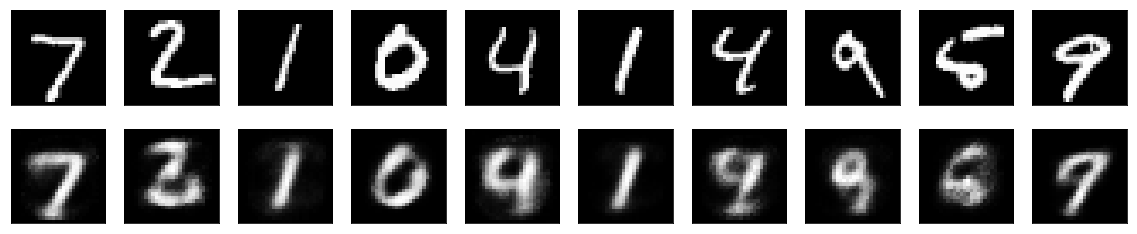

In [586]:
draw(testX, ae)

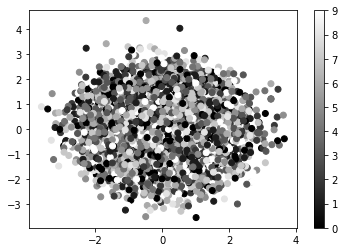

In [587]:
space(enc=ae.encoder)

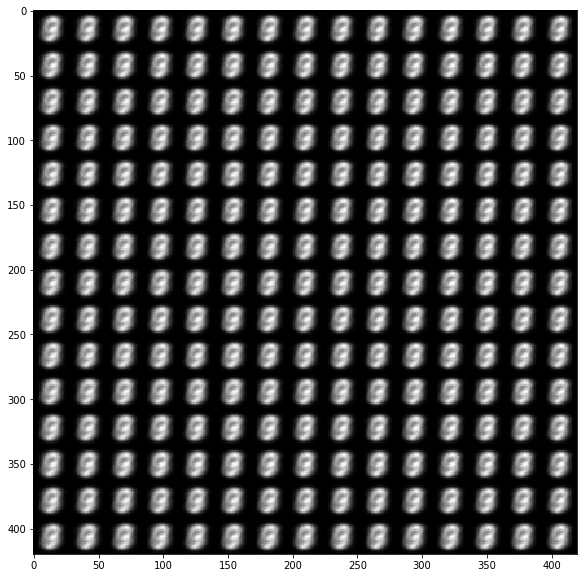

In [590]:
sample(dec=ae.decoder, epsilon_std=4)

# Something strange happened...

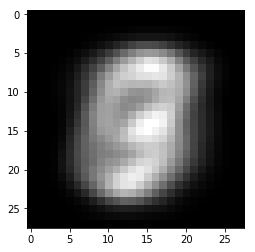

In [596]:
plt.imshow(dec.predict(np.array([[-4, 2]])).reshape((28,28)))

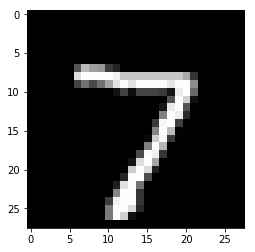

In [597]:
n = testX[0]
plt.imshow(n.reshape([28, 28]))

In [599]:
nd = ae.predict(n.reshape([1,784]))

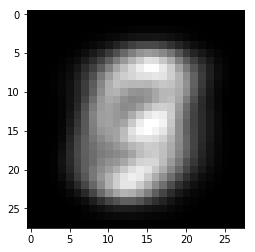

In [600]:
plt.imshow(nd.reshape([28, 28]))

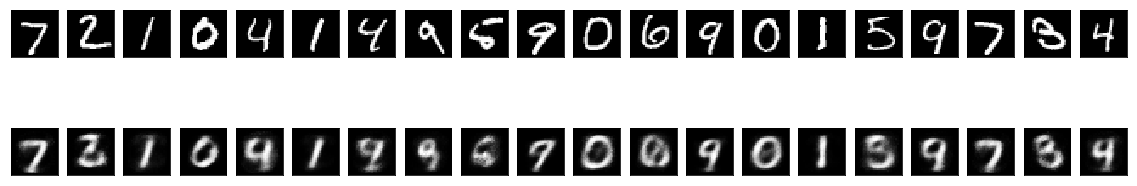

In [602]:
draw(testX[100:205], ae, n=20)

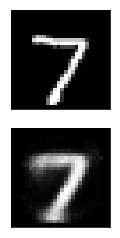

In [603]:
draw(testX, ae, n=1)

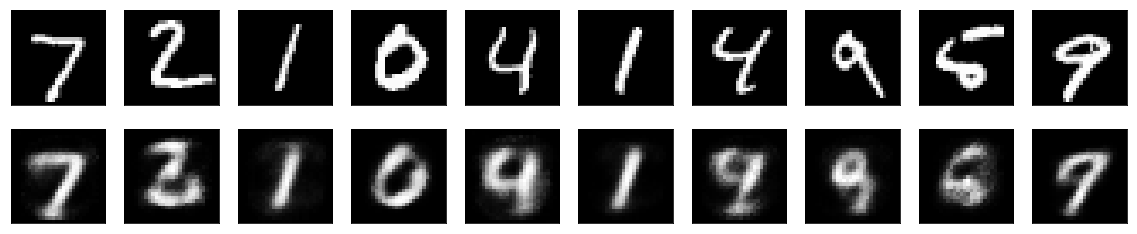

In [604]:
encoded_imgs = ae.predict(testX[:10])
plt.figure(figsize=(20, 4))
for i in range(10):
    # display original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

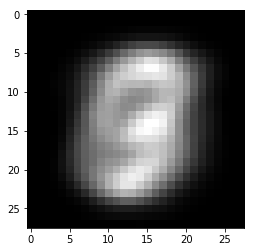

In [605]:
plt.imshow(ae.predict(testX[0].reshape(1, 784)).reshape(28, 28))

In [610]:
n.shape

(784,)

In [616]:
np.sum (np.square (ae.encoder.predict(n.reshape((1,784))) - ae.encoder.predict(n.reshape((1,784)))))

3.0161395

# MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM

In [630]:
batch_size=None
original_dim=784
latent_dim=2
intermediate_dim=64

x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [631]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=K.shape(z_mean))
    return z_mean + K.exp(z_log_sigma) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_sigma])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

In [632]:
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

In [633]:
# end-to-end autoencoder
vae = Model(x, x_decoded_mean)

# encoder, from inputs to latent space
encoder = Model(x, z_mean)

# generator, from latent space to reconstructed inputs
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

In [634]:
from keras import objectives

def vae_loss(x, x_decoded_mean):
    xent_loss = objectives.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

vae.compile(optimizer='rmsprop', loss=vae_loss)

In [636]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

epochs=10

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=256,
        validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 53s 882us/step - loss: 0.3971 - val_loss: 0.2700
Epoch 2/10
60000/60000 [==============================] - 29s 481us/step - loss: 0.2648 - val_loss: 0.2629
Epoch 3/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.2631 - val_loss: 0.2627
Epoch 4/10
60000/60000 [==============================] - 31s 519us/step - loss: 0.2629 - val_loss: 0.2625
Epoch 5/10
60000/60000 [==============================] - 31s 515us/step - loss: 0.2631 - val_loss: 0.2635
Epoch 6/10
60000/60000 [==============================] - 31s 524us/step - loss: 0.2647 - val_loss: 0.2667
Epoch 7/10
60000/60000 [==============================] - 30s 499us/step - loss: 0.2683 - val_loss: 0.2682
Epoch 8/10
60000/60000 [==============================] - 30s 495us/step - loss: 0.2738 - val_loss: 0.2818
Epoch 9/10
60000/60000 [==============================] - 28s 473us/step - loss: 0.2813 - val_

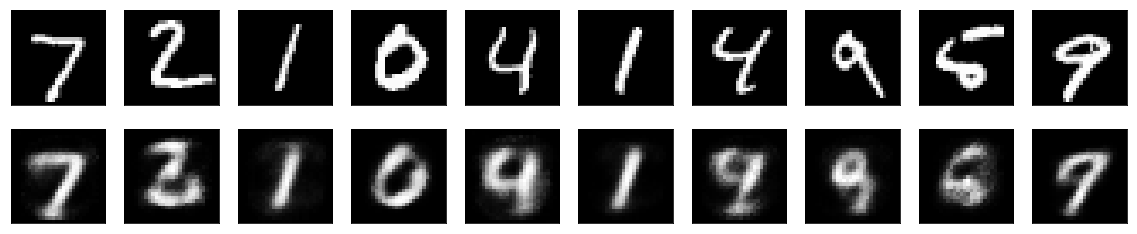

In [637]:
draw(testX, vae)

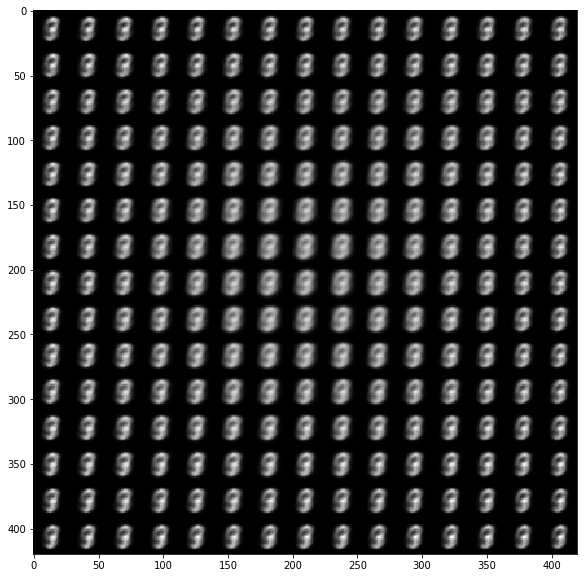

In [638]:
sample(generator)

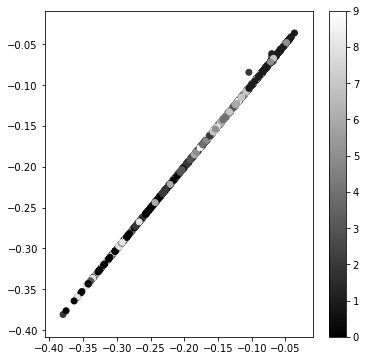

In [639]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

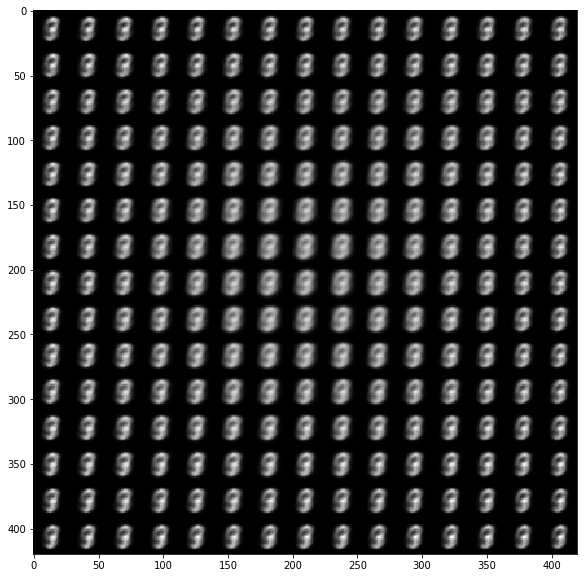

In [640]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) * epsilon_std
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

# I have to add more features... That's the only choice I have...

In [646]:
class VAE:
    def __init__(self, enc, dec, input_shape, feature_shape, epsilon_std=1., loss=binary_crossentropy, optimizer="adam", metrics=["acc"]):
        self.epsilon_std = epsilon_std
        self.x = Input(input_shape)
        self.latent = enc(self.x)
        self.z_mean = Dense(feature_shape[0])(self.latent)
        self.z_log_sigma = Dense(feature_shape[0])(self.latent)
        self.z = Lambda(self.sampling)([self.z_mean, self.z_log_sigma])
        self.y = dec (self.z)
        self.model = Model(self.x, self.y)
        def complete_loss (x, x_decoded_mean):
            custom_loss = loss(x, x_decoded_mean)
            kl_loss = - 0.5 * K.mean(1 + self.z_log_sigma - K.square(self.z_mean) - K.exp(self.z_log_sigma), axis=-1)
            return custom_loss + kl_loss
        self.model.compile(optimizer,
                           complete_loss,
                           metrics=metrics)
        self.encoder = Model(self.x, self.z)
        self.decoder = dec
    def sampling(self, args):
        z_mean, z_log_sigma = args
        epsilon = K.random_normal(shape=K.shape(z_mean),
                                  mean=0., stddev=self.epsilon_std)
        return z_mean + K.exp(z_log_sigma) * epsilon
    def fit (self, X, Y=None, val_X=None, val_Y=None, plot_losses=False, epochs=10, batch_size=256):
        if Y is None:
            Y = X
        callbacks = []
        if plot_losses:
            callbacks.append(PlotLosses())
        val_data = None
        if val_X is not None:
            if val_Y is None:
                val_data = (val_X, val_X)
            else:
                val_data = (val_X, val_Y)
        return self.model.fit(X, Y, callbacks=callbacks, batch_size=batch_size, epochs=epochs, shuffle=True, validation_data=val_data)
    def predict (self, X):
        return self.model.predict(X)

In [652]:
latent_dims = 32

enc = dense_model(784, latent_dims, layers=3)
dec = dense_model(latent_dims, 784, layers=3)

ae = VAE(enc,
         dec,
         (784,),
         (latent_dims,),
         loss=binary_crossentropy,
         optimizer="rmsprop")

In [653]:
ae.fit(trainX, val_X=testX, epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 57s 944us/step - loss: 0.3030 - acc: 0.0118 - val_loss: 0.2625 - val_acc: 0.0143
Epoch 2/3
60000/60000 [==============================] - 37s 614us/step - loss: 0.2627 - acc: 0.0128 - val_loss: 0.2629 - val_acc: 0.0049
Epoch 3/3
60000/60000 [==============================] - 39s 642us/step - loss: 0.2627 - acc: 0.0128 - val_loss: 0.2628 - val_acc: 0.0161


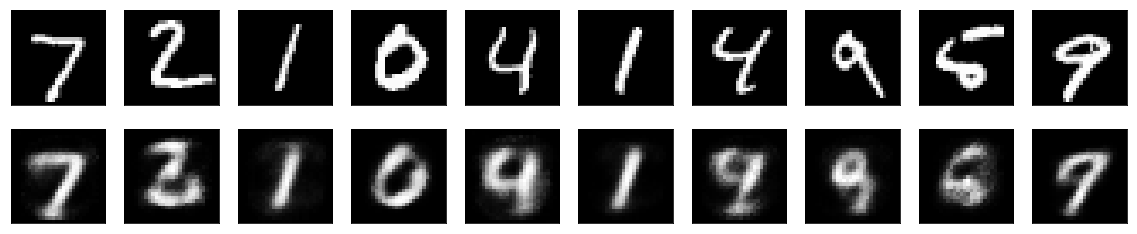

In [654]:
draw(testX, ae)

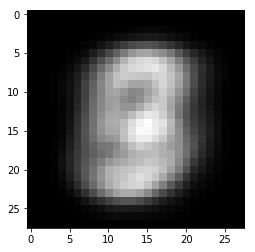

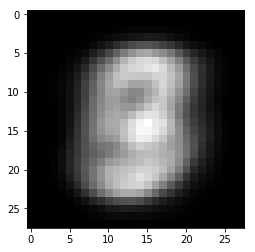

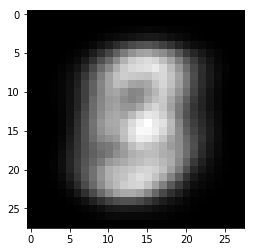

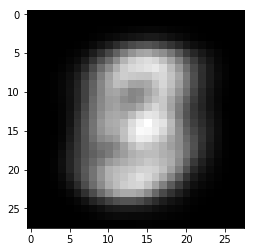

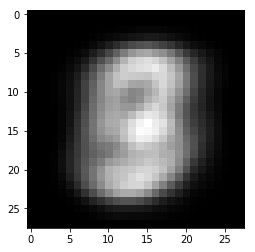

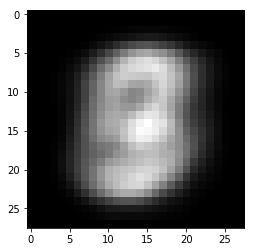

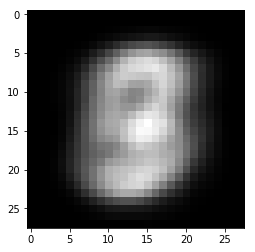

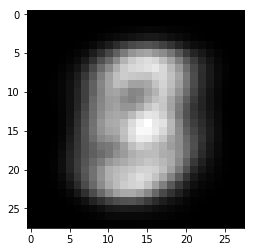

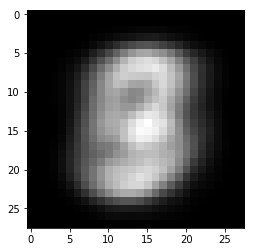

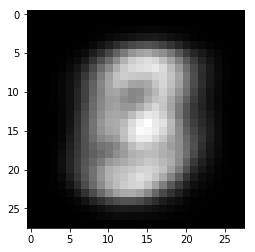

In [664]:
for i in range(10):
    plt.imshow(ae.decoder.predict(np.random.normal(size=(1, 32))).reshape(28,28))
    plt.show()

# Great...

In [666]:
def autoencoder (encoder, decoder, shape, features, loss=mean_squared_error, optimizer="adam", middle=None, metrics=["acc"]):
    added_loss = K.constant(0.)
    X = Input(shape)
    Y = encoder(X)
    if middle:
        y, new_loss = middle(features)
        added_loss = added_loss + new_loss
        Y = y (Y)
    Y = decoder(Y)
    ae = Model(inputs=X, outputs=Y)
    ae.compile(optimizer, lambda X, Y: loss(X, Y) + added_loss, metrics=metrics)
    return ae

In [668]:
enc = dense_model(784, 32, layers=1, activation="relu")
dec = dense_model(32, 784, layers=1)
ae = autoencoder(enc, dec, (784,), 32, loss=binary_crossentropy, optimizer="adam")
ae.fit(trainX, trainX, epochs=5, batch_size=256, shuffle=True)

Epoch 1/5
60000/60000 [==============================] - 48s 795us/step - loss: 0.2789 - acc: 0.0106
Epoch 2/5
60000/60000 [==============================] - 28s 469us/step - loss: 0.1732 - acc: 0.0105
Epoch 3/5
60000/60000 [==============================] - 28s 465us/step - loss: 0.1453 - acc: 0.0095
Epoch 4/5
60000/60000 [==============================] - 28s 463us/step - loss: 0.1297 - acc: 0.0098
Epoch 5/5
60000/60000 [==============================] - 28s 470us/step - loss: 0.1190 - acc: 0.0104


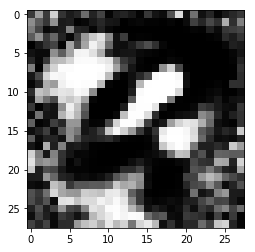

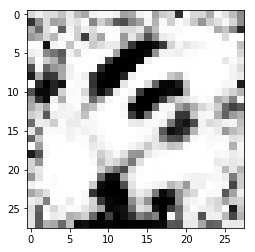

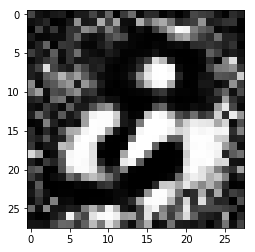

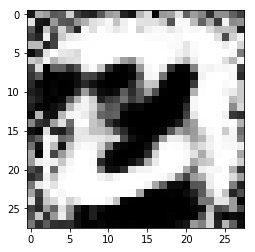

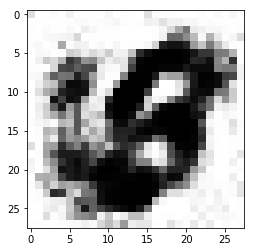

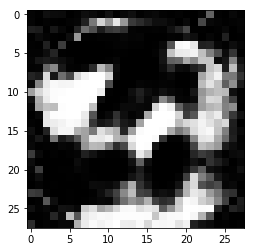

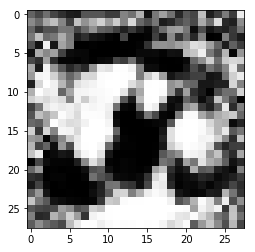

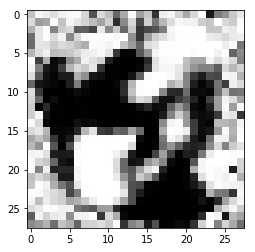

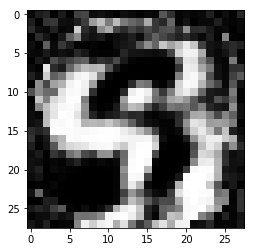

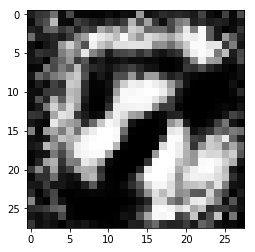

In [670]:
for i in range(10):
    plt.imshow(dec.predict(np.random.normal(size=(1, 32), scale=5)).reshape(28,28))
    plt.show()

# It's a nice nothing generator!

In [672]:
a = testX[0]
b = testX[1]
n, l = enc.predict(np.array([a, b]))

In [681]:
cn = n + (l - n) * .5

In [685]:
c = dec.predict(cn.reshape((1, 32)))

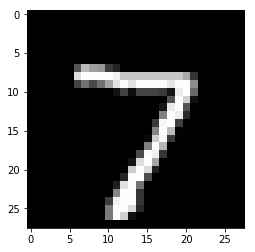

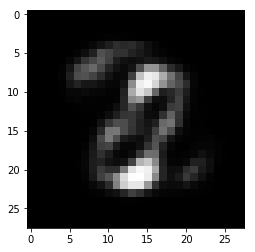

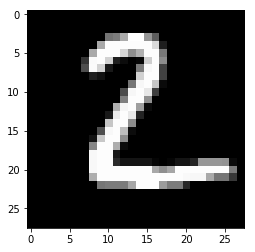

In [686]:
plt.imshow(a.reshape(28,28))
plt.show()
plt.imshow(c.reshape((28,28)))
plt.show()
plt.imshow(b.reshape((28,28)))
plt.show()

In [687]:
def lerp(a, b):
    n, l = enc.predict(np.array([a, b]))
    cn = n + (l - n) * .5
    c = dec.predict(cn.reshape((1, 32)))
    plt.imshow(a.reshape(28,28))
    plt.show()
    plt.imshow(c.reshape((28,28)))
    plt.show()
    plt.imshow(b.reshape((28,28)))
    plt.show()

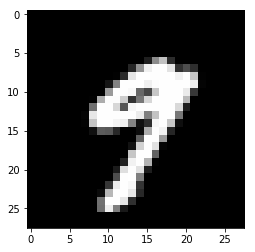

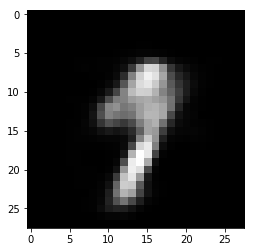

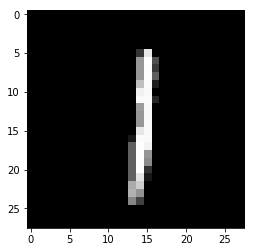

In [688]:
lerp(testX[20], testX[504])

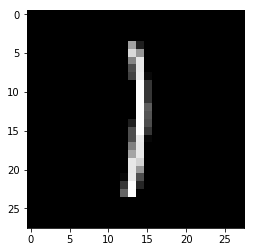

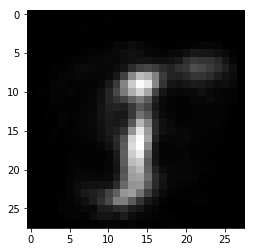

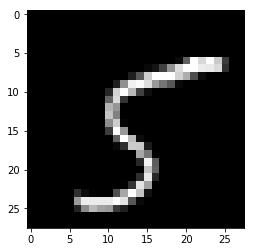

In [689]:
lerp(testX[40], testX[283])

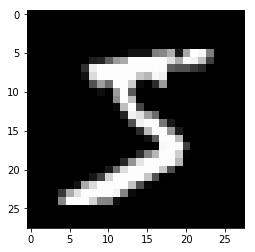

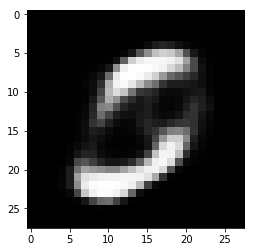

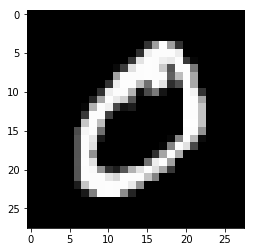

In [690]:
lerp(trainX[0], trainX[1])

In [788]:
import time
def animate (a, c, steps=2):
    an, cn = enc.predict(np.array([a, c]))
    plt.figure(figsize=(20, 20))
    for i in range(steps + 1):
        n = 1. / steps * i
        bn = an + (cn - an) * n
        b = dec.predict(bn.reshape(1, 32)).reshape(28, 28)
        ax = plt.subplot(1, steps + 1, i + 1)
        ax.axis("off")
        ax.imshow(b)

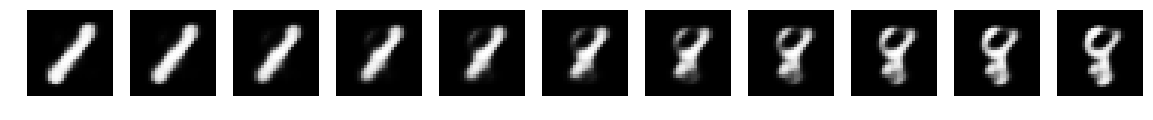

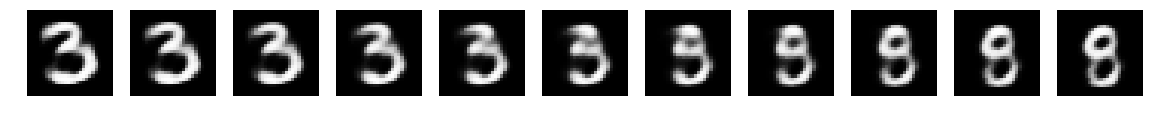

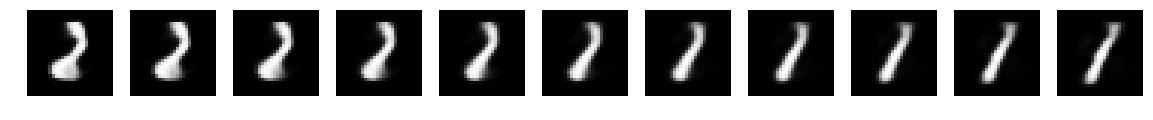

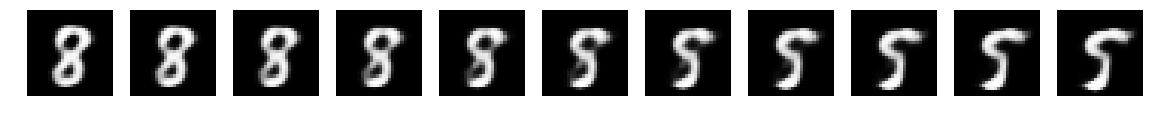

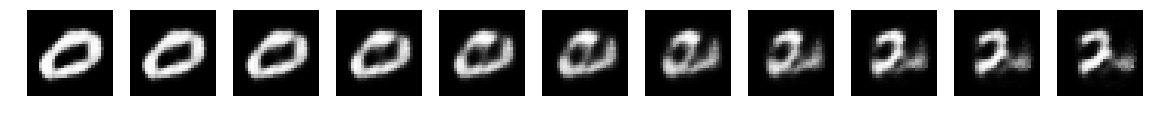

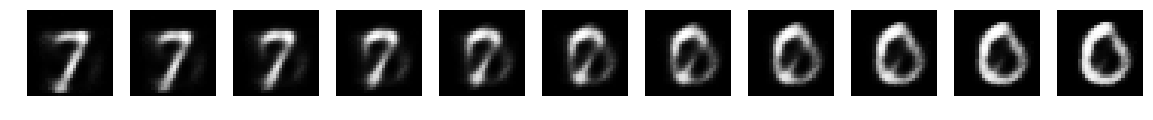

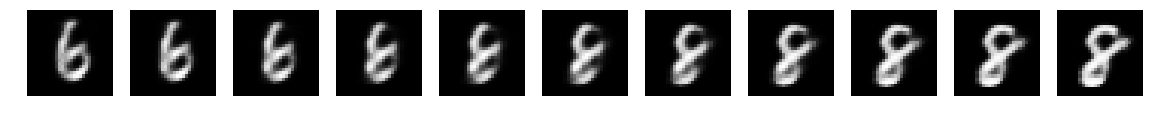

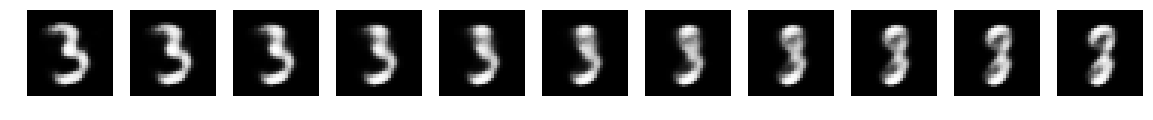

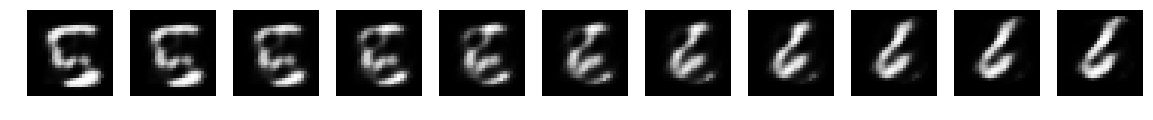

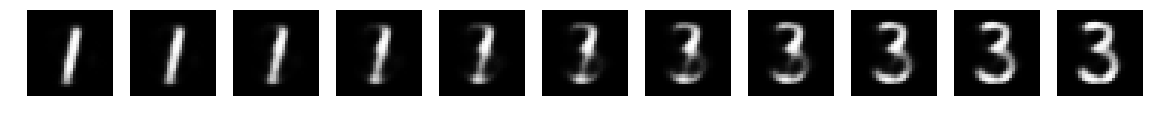

In [802]:
import random
for i in range(10):
    animate (testX[random.randint(0, 10000)], testX[random.randint(0, 10000)],  steps=10)
    plt.show()

# It actually animated pretty well!